In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon May 15 12:17:06 2017

@author: iparask
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Spark Section
Tasks=[2**i for i in range(0,18)]
execTimesSparkLocal=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Spark/SingleNode/Wrangler/timingsNoCluster_%d.npz.npy'%i)
    execTimesSparkLocal[:,i]=times[:,1]-times[:,0]
    
Tasks=[2**i for i in range(0,18)]
execTimesSparkCluster=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Spark/SingleNode/Wrangler/timings_%d.npz.npy'%i)
    execTimesSparkCluster[:,i]=times[:,1]-times[:,0]

# Dask Section
Tasks=[2**i for i in range(0,18)]
execTimesDaskCluster=np.zeros((18,10))
for task in Tasks:
    times=np.load('Dask/Wrangler/SingleNode/timings_%d.npz.npy'%task)
    execTimesDaskCluster[Tasks.index(task),:]=times[:,1]-times[:,0]
    
    
# RP section
TasksRp=[2**i for i in range(0,15)]
execTimesRP=np.zeros((15,2))
for i in range(0,2):
    times=np.load('RADICAL-pilot/SingleNode/timingsRP0.45.3_%d.npz.npy'%i)
    execTimesRP[:,i]=times[:-2,1]-times[:-2,0]

tasks = np.array([2**x for x in range(3,18)])

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True)
fig.set_size_inches(10,5)
axes[0].errorbar(Tasks[3:],execTimesSparkLocal[3:].mean(axis=1),yerr=execTimesSparkLocal[3:].std(axis=1),marker='*',label='Spark',color='b', markersize=12)
axes[0].errorbar(Tasks[3:],execTimesSparkCluster[3:].mean(axis=1),yerr=execTimesSparkCluster[3:].std(axis=1),marker='^',label='Pilot-Spark',color='orange', markersize=12)
axes[0].errorbar(Tasks[3:],execTimesDaskCluster[3:].mean(axis=1),yerr=execTimesDaskCluster[3:].std(axis=1),marker='+',label='Dask',color='k', markersize=12)
axes[0].errorbar(TasksRp[3:],execTimesRP[3:].mean(axis=1),yerr=execTimesRP[3:].std(axis=1),marker='x',label='RADICAL-Pilot',color='r', markersize=12)
axes[0].set_yscale('log',basey=10)
locs,labels = axes[0].yticks()
axes[0].set_yticklabels(['0.001','0.01','0.1','1','10','100','1000','10000'],fontsize=14)
axes[0].set_ylim([0.01,1000])
axes[0].set_xscale('log',basex=2)
axes[0].grid('on')
axes[0].set_ylabel('Time (secs)',fontsize=14)
axes[0].set_xticks(Tasks[3:])
axes[0].set_xticklabels(['8','16','32','64','128','256','512','1024','2048','4096','8192','16384','32768','65536','131072'],fontsize=14)

axes[1].plot(Tasks[3:],Tasks[3:]/execTimesSparkLocal[3:].mean(axis=1),'*-',label='Spark',color='b', markersize=12)
axes[1].plot(Tasks[3:],Tasks[3:]/execTimesSparkCluster[3:].mean(axis=1),'^-',label='Pilot-Spark',color='orange', markersize=12)
axes[1].plot(Tasks[3:],Tasks[3:]/execTimesDaskCluster[3:].mean(axis=1),'+-',label='Dask',color='k', markersize=12)
axes[1].plot(TasksRp[3:],TasksRp[3:]/execTimesRP[3:].mean(axis=1),'x-',label='RADICAL-Pilot',color='r', markersize=12)
axes[1].legend(fontsize=14)
axes[1].set_yscale('log',basey=10)
#locs,labels = plt.yticks()
#plt.yticks(locs,['0.001','0.01','0.1','1','10','100','1000','10000'])
#plt.ylim([0.01,1000])
axes[1].set_xscale('log',basex=2)
axes[1].grid('on')
axes[1].set_xlabel('Number of Tasks',fontsize=14)
axes[1].set_ylabel('Throughput (Tasks per sec)',fontsize=14)
axes[1].set_ylim([1,15000])
axes[1].set_yticks([1,10,100,1000,10000])
axes[1].set_yticklabels(['1','10','100','1000','10000'],fontsize=14)
axes[1].set_xticks(Tasks[3:])
axes[1].set_xticklabels(['8','16','32','64','128','256','512','1024','2048','4096','8192','16384','32768','65536','131072'],fontsize=14,rotation=45)
axes[1].legend(fontsize=14,bbox_to_anchor=(0., -0.8, 1,0), loc='lower center',ncol=4, borderaxespad=0.)
fig.savefig('dask_spark_rp_wrangler.pdf',dpi=800,bbox_inches='tight')

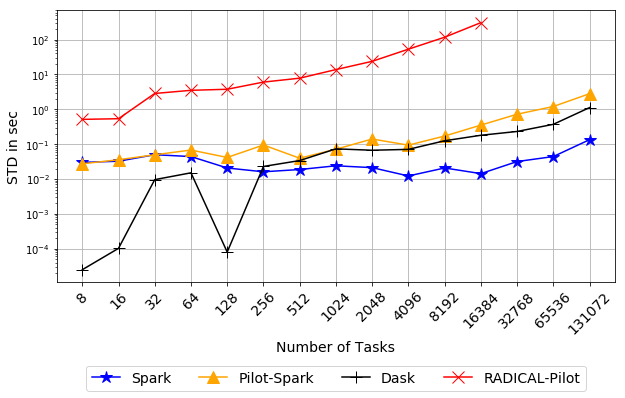

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=1,sharex=True)
fig.set_size_inches(10,5)
axes.plot(Tasks[3:],execTimesSparkLocal[3:].std(axis=1),marker='*',label='Spark',color='b', markersize=12)
axes.plot(Tasks[3:],execTimesSparkCluster[3:].std(axis=1),marker='^',label='Pilot-Spark',color='orange', markersize=12)
axes.plot(Tasks[3:],execTimesDaskCluster[3:].std(axis=1),marker='+',label='Dask',color='k', markersize=12)
axes.plot(TasksRp[3:],execTimesRP[3:].std(axis=1),marker='x',label='RADICAL-Pilot',color='r', markersize=12)
axes.set_yscale('log',basey=10)
#locs,labels = axes[0].yticks()
#axes[0].set_yticklabels(['0.001','0.01','0.1','1','10','100','1000','10000'],fontsize=14)
#axes[0].set_ylim([0.01,1000])
axes.set_xscale('log',basex=2)
axes.grid('on')
axes.set_ylabel('STD in sec',fontsize=14)
axes.set_xlabel('Number of Tasks',fontsize=14)
axes.set_xticks(Tasks[3:])
axes.set_xticklabels(['8','16','32','64','128','256','512','1024','2048','4096','8192','16384','32768','65536','131072'],fontsize=14,rotation=45)
axes.legend(fontsize=14,bbox_to_anchor=(0., -0.4, 1,0), loc='lower center',ncol=4, borderaxespad=0.)
fig.savefig('dask_spark_rp_wrangler_std.pdf',dpi=800,bbox_inches='tight')

In [ ]:
fig.set_size_inches